In [208]:
import seaborn as sns

In [209]:
penguins = sns.load_dataset("penguins")

naive bayes, knn(k=3), decisione tree(depth=3) 로 펭귄 종을 예측하는 모델을 만들고 학습시키자.

각 모델의 정확도, f1 score, preicision score, recall socre, roc auc score 를 출력하자.

In [210]:
print(penguins.isna().sum())
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [211]:
penguins.dropna(inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [212]:
x = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

In [213]:
y = y.map(lambda x : 0 if x =="Adelie" else ( 1 if  x =="Chinstrap" else 2))

In [214]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [216]:
x_scale = StandardScaler().fit_transform(x)

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=1)

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
model01 = GaussianNB()

In [220]:
model01.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [221]:
predict01 = model01.predict(x_test)

In [222]:
naive_bayes_score = accuracy_score(y_test, predict01)
naive_bayes_score

0.95

In [223]:
proba = model01.predict_proba(x)
proba_class = (proba > 0.8) + 0
proba_class

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

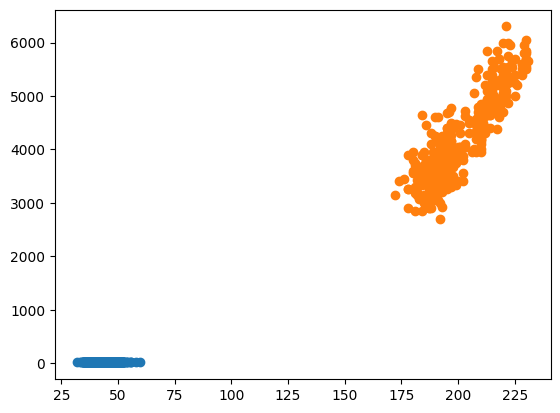

In [224]:
plt.scatter(x["bill_length_mm"], x["bill_depth_mm"])
plt.scatter(x["flipper_length_mm"], x["body_mass_g"])
plt.show()

In [225]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
model02 = KNeighborsClassifier(n_neighbors=3)

In [227]:
model02.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [228]:
predict02 = model02.predict(x_test)

In [229]:
knn_score = accuracy_score(y_test, predict02)
knn_score

0.98

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [231]:
model03 =  DecisionTreeClassifier()

In [232]:
model03 = DecisionTreeClassifier(max_depth=3)
model03.fit(x_train, y_train)
predict03 = model03.predict(x_test)
decision_tree_score = accuracy_score(y_test, predict03)
decision_tree_score

0.92

In [233]:
print(f"naive_bayes_score : {naive_bayes_score}")
print(f"{knn_score}")
print(f"{decision_tree_score}")

naive_bayes_score : 0.95
0.98
0.92


In [234]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [235]:
predict_proba01 = model01.predict_proba(x_test)
predict_proba02 = model02.predict_proba(x_test)
predict_proba03 = model03.predict_proba(x_test)

In [236]:
accuracy_score01 = accuracy_score(y_test, predict01)
precision_score01 = precision_score(y_test, predict01, average='weighted')
recall_score01 = recall_score(y_test, predict01, average='weighted')
f1_score01 = f1_score(y_test,predict01, average='weighted')
roc_auc_score01 = roc_auc_score(y_test, predict_proba01, multi_class='ovr',average='weighted')

print(f"--naive_bayes--")
print(f"score : {naive_bayes_score:.3f}")
print(f"accuracy score : {accuracy_score01:.3f}")
print(f"precision score : {precision_score01:.3f}")
print(f"recall score : {recall_score01:.3f}")
print(f"f1 score : {f1_score01:.3f}")
print(f"roc auc score : {roc_auc_score01:.3f}")


--naive_bayes--
score : 0.950
accuracy score : 0.950
precision score : 0.959
recall score : 0.950
f1 score : 0.951
roc auc score : 0.997


In [241]:
accuracy_score02 = accuracy_score(y_test, predict02)
precision_score02 = precision_score(y_test, predict02, average='weighted')
recall_score02 = recall_score(y_test, predict02, average='weighted')
f1_score02 = f1_score(y_test,predict02, average='weighted')
roc_auc_score02 = roc_auc_score(y_test, predict_proba02, multi_class='ovr',average='weighted')

print(f"--knn score--")
print(f"score : {knn_score:.3f}")
print(f"accuracy score : {accuracy_score02:.3f}")
print(f"precision score : {precision_score02:.3f}")
print(f"recall score : {recall_score02:.3f}")
print(f"f1 score : {f1_score02:.3f}")
print(f"roc auc score : {roc_auc_score02:.3f}")

--knn score--
score : 0.980
accuracy score : 0.980
precision score : 0.982
recall score : 0.980
f1 score : 0.980
roc auc score : 1.000


In [238]:
accuracy_score03 = accuracy_score(y_test, predict03)
precision_score03 = precision_score(y_test, predict03, average='weighted')
recall_score03 = recall_score(y_test, predict03, average='weighted')
f1_score03 = f1_score(y_test,predict03, average='weighted')
roc_auc_score03 = roc_auc_score(y_test, predict_proba03, multi_class='ovr',average='weighted')

print(f"--decision tree--")
print(f"score : {decision_tree_score:.3f}")
print(f"accuracy score : {accuracy_score03:.3f}")
print(f"precision score : {precision_score03:.3f}")
print(f"recall score : {recall_score03:.3f}")
print(f"f1 score : {f1_score03:.3f}")
print(f"roc auc score : {roc_auc_score03:.3f}")

--decision tree--
score : 0.920
accuracy score : 0.920
precision score : 0.920
recall score : 0.920
f1 score : 0.920
roc auc score : 0.974
